In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve





import warnings
warnings.filterwarnings("ignore")

# Objective of this case study is:

### 1. To see if the credit line of the customer should be extended or not. 
### 2. If we extend, then what should be loan repayment terms

# Discussion:

### If we break this in terms of data provided, "loan status" is our target variable. We have to 
### see how it maps to attributes of individuals. Target variable "loan status" takes two values- "fully paid" and "charged off".
### So, we have to see which are the cases where it got "charged off" and we dont extend credit line to them.
### whereas, if we extend credit line to individuals, we have to see which are most favourable attributes for loan repayment. 

### Lets approach the problem step by step:
### 1. EDA on input features (shape, missing value, conclusions from univariate and bivariate analysis)
### 2. Correlation among input features
### 3. Feature engineering
### 4. Build a logistic regression model
### 5. Check model coefficients 
### 6. check important features driving the Loan Status- how it varies wrt attributes of individual

# Metric discussion:
### To evaluate a classification model, we can target to minimise False Positives(FP) in the model or False Negatives(FN) and accordingly Precision and Recall.
### In present case, considering "Charged Off" as class 1,if we minimize FP- this means we are predicting "charging-off" more. This may lead to loss in revenue. Whereas, if we minimize FN- this means we are "charging-off" less implying we are letting go individuals who defaults. So, we need to balance this trade-off. Since we have to balance both , we will focus on f1 score. 


In [220]:
df = pd.read_csv("lendingClub_data.txt")

In [221]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [231]:
len(df[df['grade'] == 'B'])

116018

In [ ]:
df.iloc[0]

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df.describe()

### Few quick observations: 
### 1. There are 396,030 rows and 27 columns
### 2. Missing data is present in "emp_title", "emp_length", "title", "revol_util","mort_acc","pub_rec_bankruptcies"
### 3. All the columns are either float or object data types


### This notebook is divided into 3 sections: 
### Section1: gives basic EDA to determine factors affecting loan repayment. It is further divided into Univariate and Bivariate sections. 
### Section2: focuses on model building and metric discussion
### Section3: recommendation and insights


# Section-1: Lets do EDA to understand the data

### first lets drop target variable ("loan_status") from the X-features and save it as y.
### lets divide the X features into "object" and "float" dtypes and then analyse

In [3]:
y = df[['loan_status']]
X = df.drop(['loan_status'],axis=1)

In [4]:
X.shape, df.shape, y.shape

((396030, 26), (396030, 27), (396030, 1))

In [5]:
Xnum = X.select_dtypes(exclude = 'object')
Xobj = X.select_dtypes(include = 'object')

 
column: loan_amnt
count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
 


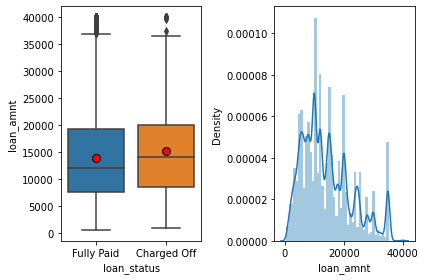

 
 
column: int_rate
count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64
 


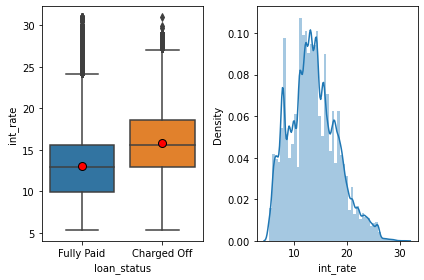

 
 
column: installment
count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64
 


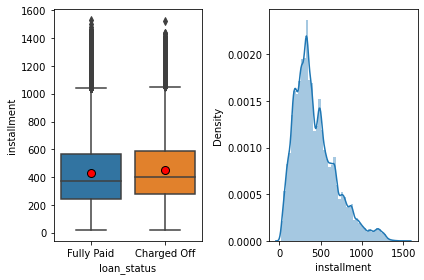

 
 
column: annual_inc
count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64
 


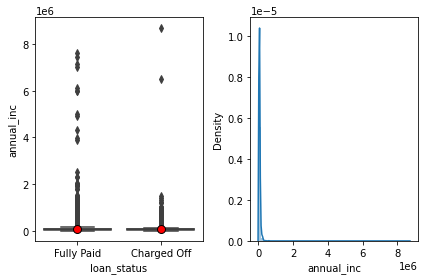

 
 
column: dti
count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64
 


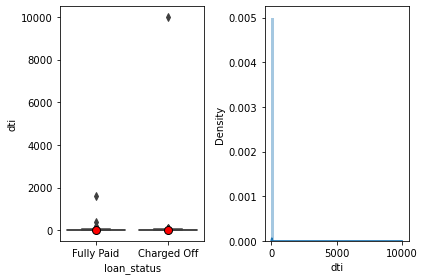

 
 
column: open_acc
count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64
 


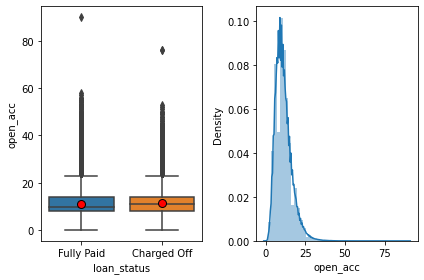

 
 
column: pub_rec
count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64
 


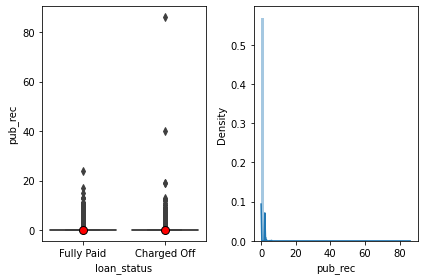

 
 
column: revol_bal
count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64
 


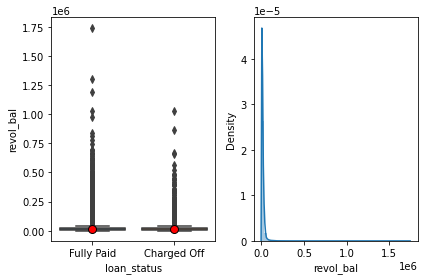

 
 
column: revol_util
count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64
 


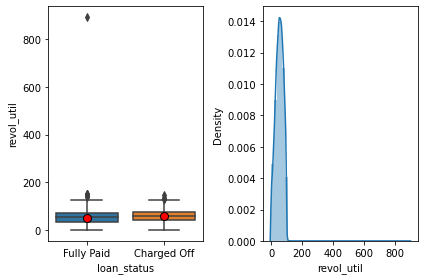

 
 
column: total_acc
count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64
 


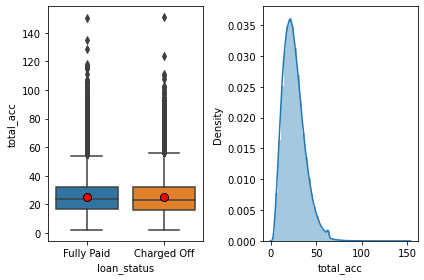

 
 
column: mort_acc
count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64
 


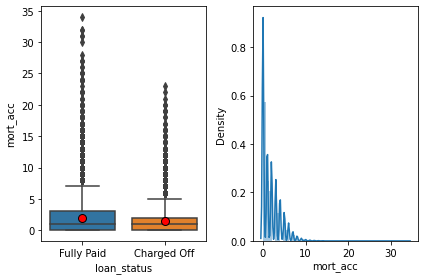

 
 
column: pub_rec_bankruptcies
count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64
 


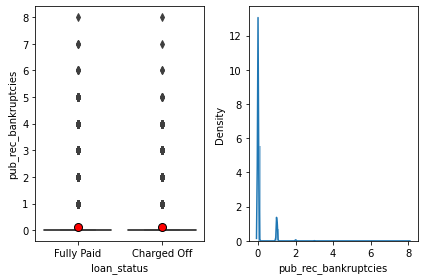

In [6]:
# plt.figure(figsize=(10,10))

for col in Xnum.columns:
    print(' ')
    print(f'column: {col}')
    print(df[col].describe())
    print(' ')
    fig, ax =plt.subplots(1,2)
    sns.boxplot(y = df[col], ax = ax[0], x= df['loan_status'] ,showmeans=True
               , meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
    sns.distplot(df[col], ax= ax[1])
    plt.tight_layout()
    plt.show()
    print(' ')
    

### conclusion from above plots:

### assuming currency is Rupees--
### 1. Loan amount on average varies from of Rs. 12000- Rs.14000 with maximun loan amount to Rs.40,000. Distribution looks little right skewed, 
###   may be presence of outliers, or people getting higher loan amount. Min-max Range : 500-40,000. 
### 2. Interest rate on average is : 13% with highest interest rate being 30%. Min-max range : 5.3 -30.99. Distribution looks normal.
### 3. Installment: average monthly installment is Rs.400 with highest value of Rs. 1530. Min-max range: 16-1533. Distribution looks small right skewed.
### 4. annual_inc: average Annual income is Rs. 74,000 with maximum value of Rs.87,000,00. 
###    We can remove this value and see how does the distribution look like. Min-max range: 0-8.7 * 10^6. Highly right skewed.
### 5. dti: average value is : 17 with max value : 9999. This looks to be outlier. We can check. Range :  0-9999
### 6. open_acc: average value number of credit-lines is 11. min-max range: 0-90
### 7. pub_rec: There are few derogatory public records against few individuals.Mean is around:0.17. Max value: 86
### 8. revol_bal: average value of Total credit revolving balance is 1.6*10^4. Min-max range: 0-1.74*10^6
### 9. revol_util: average value of Revolving line utilization rate is 54. Min-max range: 0-892.Point 892 looks like outlier,otherwise it looks normal. We can check.
### 10.total_acc: average number of credit lines is 25, with min-max range: 2-151. Distribution looks little right skewed.
### 11.mort_acc: average number of mortgage account is 1.8, with min-max range : 0-34. Distribution is right skewed.
### 12.pub_rec_bankruptcies: Min-max range for number of public record bankruptcies is 0-8. 

### 13. "Charged off" : Charged off in loan status is more when there is high "int_rate" and "loan_amnt".


### lets try to see if there is any strong correlation among the variables as it loooks from initial above analysis that few variables 
### measure similar attributes like for eg: open_acc vs. total_acc or mort_acc


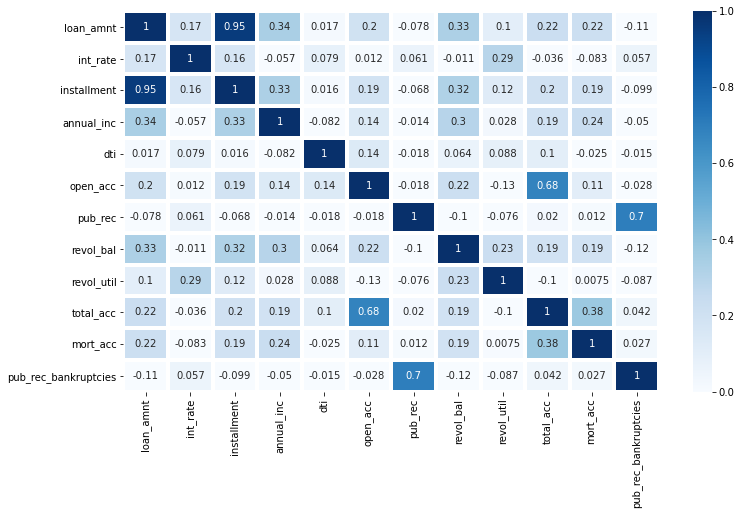

In [7]:
cormap = Xnum.corr(method='pearson')
plt.figure(figsize=(12,7))
sns.heatmap(cormap,annot=True,linewidth =3,cmap='Blues', vmax=0,vmin=1)
plt.show()

### few observation from correlation plot above:
### 1. There is very high correlation between loan_amount to installment. This looks obvious as higher the loan amount, higher the installment amount. But, we can check interest rate as well.
### 2. There is good correlation among loan_amount with features like annual_inc, revol_balance
### 3. There is good correlation between int_rate and revol_util. 
### 4. There is good correlation between installment and revol_bal. 
### 5. There is good correlation between annual_inc and revol_bal , mort_acc. 
### 6. There is strong correlation between open_acc and total_acc 
### 7. There is strong correlation between pub_rec and pub_rec_bankruptcies.
### 8. There is good correlation between total_acc and mort_acc. 

### In order to evaluate the driving factors for loan_status, we can check with reference to above conclusion. (taking one of the variables in model building step which shows strong/good correlation)



In [13]:
len(df[(df['grade'] =='C') & (df['loan_status'] == 'Charged Off')])/ len(df[(df['grade'] =='C') & (df['loan_status'] == 'Fully Paid')])


0.26872800402212166

In [14]:
# len(df[(df[df['grade'] == 'A']) & (df['loan_status'] == 'Fully Paid')])

len(df[(df['grade'] =='B') & (df['loan_status'] == 'Charged Off')])/ len(df[(df['grade'] =='C') & (df['loan_status'] == 'Fully Paid')])


0.1746151452033805

### Next, we evaluate the object-datatypes features. 

 
column: term
count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object
 
Index([' 36 months', ' 60 months'], dtype='object')
 


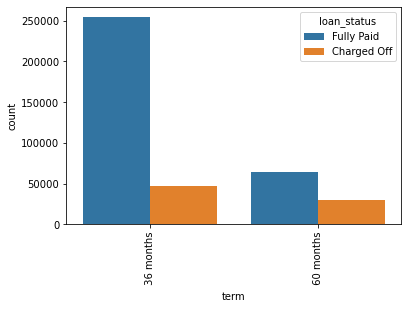

 
 
column: grade
count     396030
unique         7
top            B
freq      116018
Name: grade, dtype: object
 
Index(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype='object')
 


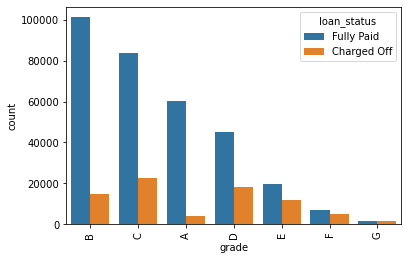

 
 
column: sub_grade
count     396030
unique        35
top           B3
freq       26655
Name: sub_grade, dtype: object
 
Index(['B3', 'B4', 'C1', 'C2', 'B2', 'B5', 'C3', 'C4', 'B1', 'A5', 'C5', 'D1',
       'A4', 'D2', 'D3', 'D4', 'A3', 'A1', 'D5', 'A2'],
      dtype='object')
 


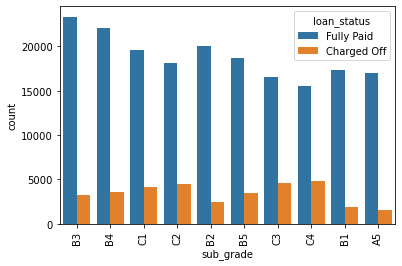

 
 
column: emp_title
count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object
 
Index(['Teacher', 'Manager', 'Registered Nurse', 'RN', 'Supervisor', 'Sales',
       'Project Manager', 'Owner', 'Driver', 'Office Manager', 'manager',
       'Director', 'General Manager', 'Engineer', 'teacher', 'driver',
       'Vice President', 'Operations Manager', 'Administrative Assistant',
       'Accountant'],
      dtype='object')
 


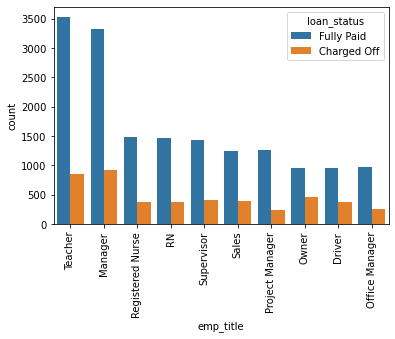

 
 
column: emp_length
count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object
 
Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')
 


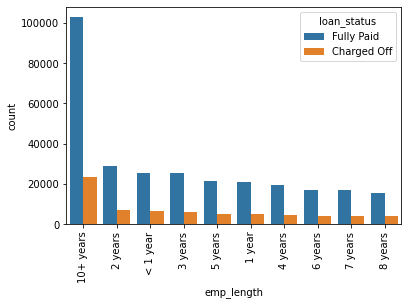

 
 
column: home_ownership
count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object
 
Index(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype='object')
 


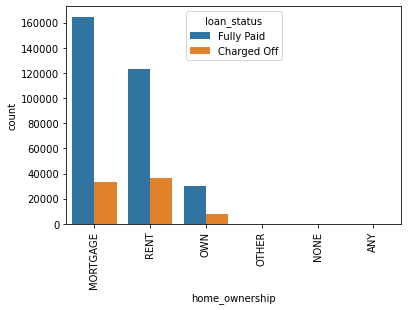

 
 
column: verification_status
count       396030
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object
 
Index(['Verified', 'Source Verified', 'Not Verified'], dtype='object')
 


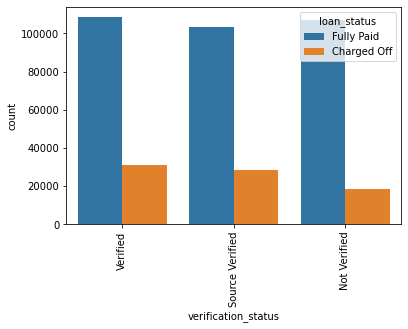

 
 
column: issue_d
count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object
 
Index(['Oct-2014', 'Jul-2014', 'Jan-2015', 'Dec-2013', 'Nov-2013', 'Jul-2015',
       'Oct-2013', 'Jan-2014', 'Apr-2015', 'Sep-2013', 'Aug-2013', 'Apr-2014',
       'Nov-2014', 'May-2014', 'Jul-2013', 'Oct-2015', 'May-2015', 'Mar-2014',
       'Jun-2013', 'Aug-2014'],
      dtype='object')
 


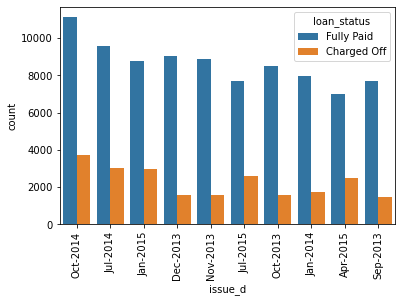

 
 
column: purpose
count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object
 
Index(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'major_purchase', 'small_business', 'car', 'medical', 'moving',
       'vacation', 'house', 'wedding', 'renewable_energy', 'educational'],
      dtype='object')
 


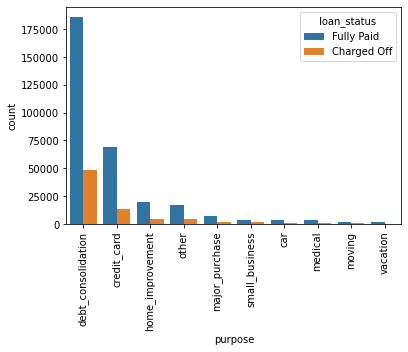

 
 
column: title
count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object
 
Index(['Debt consolidation', 'Credit card refinancing', 'Home improvement',
       'Other', 'Debt Consolidation', 'Major purchase', 'Consolidation',
       'debt consolidation', 'Business', 'Debt Consolidation Loan',
       'Medical expenses', 'Car financing', 'Credit Card Consolidation',
       'Vacation', 'Moving and relocation', 'consolidation', 'Personal Loan',
       'Consolidation Loan', 'Home Improvement', 'Home buying'],
      dtype='object')
 


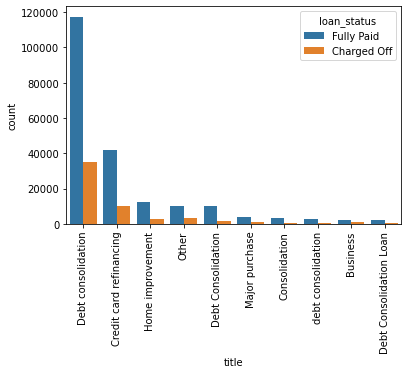

 
 
column: earliest_cr_line
count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object
 
Index(['Oct-2000', 'Aug-2000', 'Oct-2001', 'Aug-2001', 'Nov-2000', 'Oct-1999',
       'Nov-1999', 'Sep-2000', 'Oct-2002', 'Aug-2002', 'Sep-2001', 'Aug-1999',
       'Sep-1999', 'Sep-2002', 'Dec-2000', 'Sep-2003', 'Dec-1999', 'Oct-2003',
       'Nov-2001', 'Dec-2001'],
      dtype='object')
 


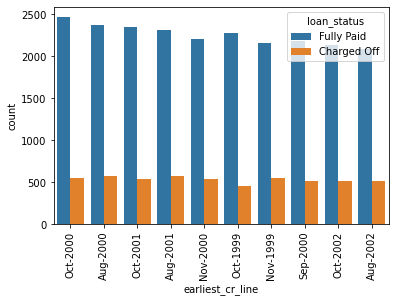

 
 
column: initial_list_status
count     396030
unique         2
top            f
freq      238066
Name: initial_list_status, dtype: object
 
Index(['f', 'w'], dtype='object')
 


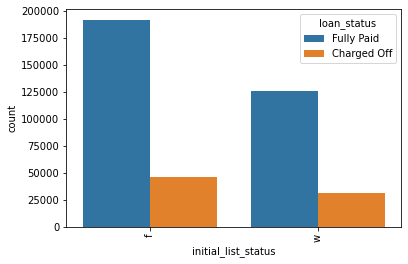

 
 
column: application_type
count         396030
unique             3
top       INDIVIDUAL
freq          395319
Name: application_type, dtype: object
 
Index(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype='object')
 


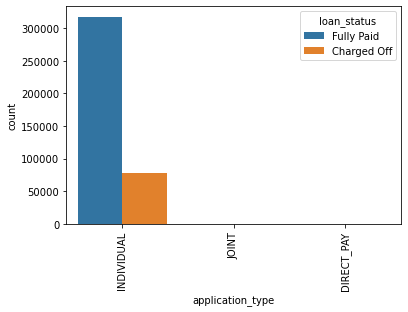

 
 
column: address
count                          396030
unique                         393700
top       USS Johnson\r\nFPO AE 48052
freq                                8
Name: address, dtype: object
 
Index(['USS Johnson\r\nFPO AE 48052', 'USCGC Smith\r\nFPO AE 70466',
       'USS Smith\r\nFPO AP 70466', 'USNS Johnson\r\nFPO AE 05113',
       'USNS Johnson\r\nFPO AP 48052', 'USNV Brown\r\nFPO AA 48052',
       'USNV Smith\r\nFPO AE 30723', 'USS Smith\r\nFPO AP 22690',
       'USCGC Jones\r\nFPO AE 22690', 'USNS Johnson\r\nFPO AA 70466',
       'USNV Smith\r\nFPO AA 00813', 'USCGC Smith\r\nFPO AA 70466',
       'USCGC Miller\r\nFPO AA 22690', 'USCGC Smith\r\nFPO AE 00813',
       'USNV Johnson\r\nFPO AP 70466', 'USCGC Lee\r\nFPO AA 22690',
       'USNS Smith\r\nFPO AE 00813', 'USS Smith\r\nFPO AP 00813',
       'USCGC Brown\r\nFPO AA 30723', 'USNS Brown\r\nFPO AP 29597'],
      dtype='object')
 


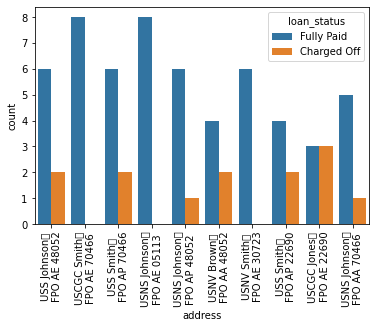

In [17]:
# plt.figure(figsize=(10,10))

for col in Xobj.columns:
    print(' ')
    print(f'column: {col}')
    print(X[col].describe())
    print(' ')
    print((Xobj[col].value_counts())[0:20].index)
    print(' ')
    sns.countplot(x=col,data=df, hue ='loan_status',order=df[col].value_counts().nlargest(n=10).index)
    plt.xticks(rotation=90)
    plt.show()

    plt.show()
    print(' ')

## Observation from above plots for categorical variables:

### 1. More often , the loan term is for 36months. Charged_off is also similar in both unique values.
### 2. More often, the individuals are "teacher" and "Manager".  Charged_off" is also similar in both.
### 3. emp_length > 10+ is favourable for loan disburse,  Charged_off is also greater in >10+ emp_length.
### 4. home_ownership is "mortgage" or "rent" is more favorable. ""Charged_off" is also higher for "Mortgage" and "rent".
### 5. purpose of loan is "Debt consolidation" followed by "credit card". "charged_off" is also similar in both unique values.
### 6. title : of the loan follows mostly "debt consolidation". However, it is present with variations in the data like "Debt consolidation" / 'Debt Consolidation'/ 'debt consolidation'/ 'Debt Consolidation Loan'or 'consolidation'/'Consolidation Loan'' -> we can do some feature enginnering to merge all into one common name But here also, loan is given with tile "Debt consolidation" followed by "credit card" . ""Charged_off" is also similar in all.
### 7. Loan is mostly given to "Individuals" and "Charged_off" is more for "Individuals".
### 8. According to address (geography), loan is mostly disrbused to AE 05113 and AE 70466 locations where it was fully-paid and no charged_off was observed. There is 50-50 case for location AE 22690 where fully_paid records are same of of charged_off.

# Bivariate analysis

## lets start with bivariate plots for numerical features 

In [18]:
### we saw that there is high correlation observed among variables:  open_acc vs. total_acc or mort_acc.
### lets plot to confirm

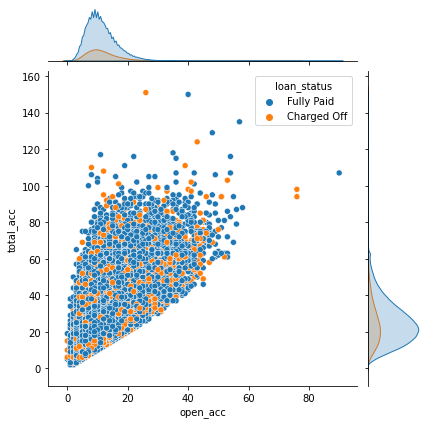

In [19]:
sns.jointplot(df['open_acc'] , df['total_acc'], hue=df['loan_status'])

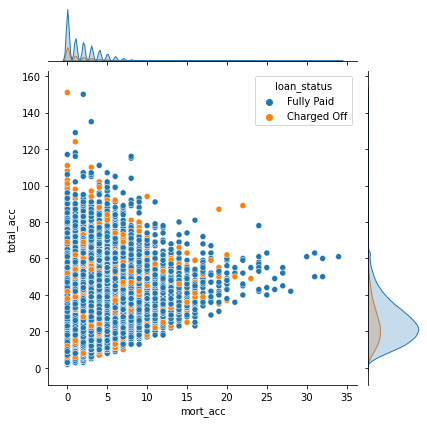

In [20]:
sns.jointplot(df['mort_acc'] , df['total_acc'],  hue=df['loan_status'])

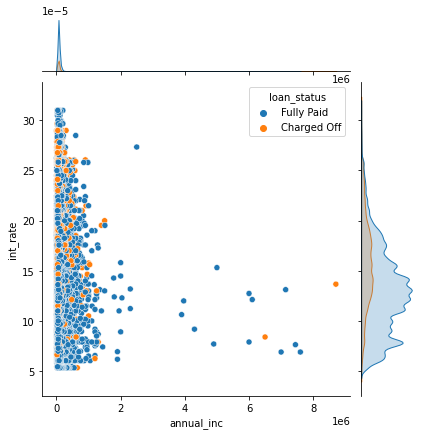

In [21]:
sns.jointplot(df['annual_inc'] , df['int_rate'],  hue=df['loan_status'])

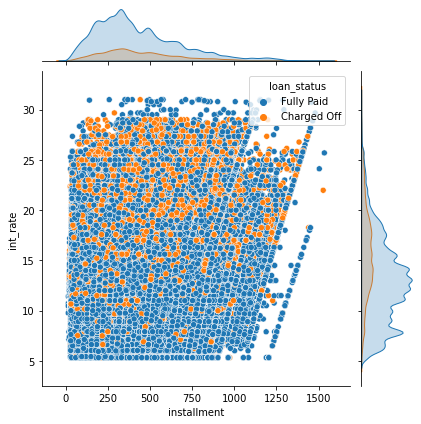

In [22]:
sns.jointplot(df['installment'] , df['int_rate'],  hue=df['loan_status'])

### conclusion from above plots is:
### There is not much relationship between the variables : installment vs. int_rate, annual_inc vs int_rate, mort_acc vs total_acc 
### there is slight linear relation between "open_acc" vs "total_acc"
### but overall, the loan_status is not largely affected by these features. We might say higher int_rate has higher "charged_off" . But we have to confirm with feature_importance plots. 

# Section2: focuses on model building and metric discussion

In [23]:
## lets analyse the target variable:

In [24]:
y.value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
dtype: float64

### around 80% of data belongs to "fully paid" status while 20% of data belongs to "charged Off" class. As we are mostly insterested in "Charged Off" class which is minority class, it has got good coverage of 20%. Hence,we will continue with building model with standard Logistic regression methods. We will not use any class-imbalance techniques here. 

## feature engineering

In [25]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

### 1. lets first consolidate multiple values of "debt consolidation" in title" into single a value

In [26]:
print(X[X['title'].str.contains('cons') == True]['title'].nunique())
print(X[X['title'].str.contains('Cons') == True]['title'].nunique())

print(X[X['title'].str.contains('debt') == True]['title'].nunique())
print(X[X['title'].str.contains('Debt') == True]['title'].nunique())

2654
4587
3386
5106


In [27]:
print('word : cons ---- > ',X[X['title'].str.contains('cons') == True]['title'].unique())
print('word: Cons ---- > ',X[X['title'].str.contains('Cons') == True]['title'].unique())

print('word: debt ---- >',X[X['title'].str.contains('debt') == True]['title'].unique())
print('word: Debt ---- >',X[X['title'].str.contains('Debt') == True]['title'].unique())

word : cons ---- >  ['Debt consolidation' 'debt consolidation' 'consolidation loan' ...
 'Debt consolidation thank you' 'consolidation 4'
 'smart consolidation plan']
word: Cons ---- >  ['Debt Consolidation' 'Debt Consolidation/Home Repairs'
 'Consolidation Loan' ... 'Consolidate and payoff' 'Consolidate all Loans'
 '2011 Insurance and Debt Consolidation']
word: debt ---- > ['Credit card debt' 'Consolidate debt' 'debt consolidation' ...
 'Consolidating debt to become debt-free'
 'Fixing up rental to reduce debt' 'smart debt']
word: Debt ---- > ['Debt consolidation' 'Debt Consolidation'
 'Debt Consolidation/Home Repairs' ... 'Cc Debt'
 '2011 Insurance and Debt Consolidation' 'Toxic Debt Payoff']


### the words like "debt", "Debt" look similar, also "Cons", "cons" pointing to consolidation. We can combine them as single "Debt consolidation" value. But due to lack of domain knowledge, I decided not to go ahead

### Also, feature "purpose" and "title" look similar,however, there are "title" has 1755 missing values, we will take "purpose" in the model.

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [29]:
### 2. Address : we can extract last 8 characters for modeling. Lets first check if they are unique.

In [30]:
X['address'].nunique()

393700

In [31]:
X['address'].value_counts()[0:10]

USS Johnson\r\nFPO AE 48052     8
USCGC Smith\r\nFPO AE 70466     8
USS Smith\r\nFPO AP 70466       8
USNS Johnson\r\nFPO AE 05113    8
USNS Johnson\r\nFPO AP 48052    7
USNV Brown\r\nFPO AA 48052      6
USNV Smith\r\nFPO AE 30723      6
USS Smith\r\nFPO AP 22690       6
USCGC Jones\r\nFPO AE 22690     6
USNS Johnson\r\nFPO AA 70466    6
Name: address, dtype: int64

In [32]:
X['address'].apply(lambda x: x.split('\r')[0]+'_'+x[-8:]).nunique()

393700

In [33]:
X['address'].apply(lambda x: x.split('\r')[0]+'_'+x[-8:]).value_counts()[0:10]

USS Johnson_AE 48052     8
USCGC Smith_AE 70466     8
USNS Johnson_AE 05113    8
USS Smith_AP 70466       8
USNS Johnson_AP 48052    7
USNS Johnson_AA 70466    6
USCGC Jones_AE 22690     6
USNV Brown_AA 48052      6
USS Smith_AP 22690       6
USNV Smith_AA 00813      6
Name: address, dtype: int64

In [34]:
X['address_extract'] = X['address'].apply(lambda x: x.split('\r')[0]+'_'+x[-8:])

### since the number of extracted count is similar to orginal count and values also look similar, so we will go ahead with this feature

### 3.we can create flags on features like: 1. Pub_rec 2. Mort_acc 3. Pub_rec_bankruptcies

In [35]:
X['pub_rec'].describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [36]:
X[X['pub_rec'] == 86]['pub_rec']

218818    86.0
Name: pub_rec, dtype: float64

In [37]:
X['pub_rec_flag'] = X['pub_rec'].apply(lambda x: 1 if x > 1 else 0)

In [38]:
X['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [39]:
X[X['mort_acc'] ==34]['mort_acc']

10208    34.0
Name: mort_acc, dtype: float64

In [40]:
X['mort_acc_flag'] = X['mort_acc'].apply(lambda x: 1 if x > 1 else 0)

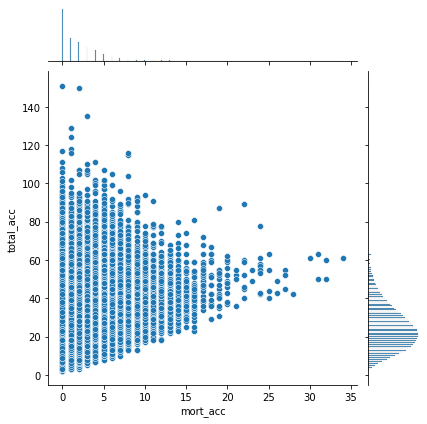

In [41]:
sns.jointplot(X['mort_acc'], X['total_acc'])

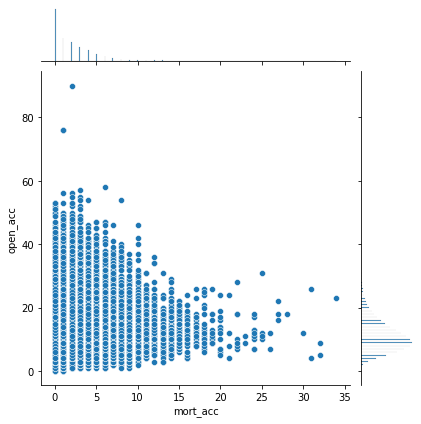

In [42]:
sns.jointplot(X['mort_acc'], X['open_acc'])

### As, there is no distinct relation between "mort_acc" and "open_acc", "total_acc", we will just go ahead with the flag for this feature. This will take care of missing record of 37795 in mort_acc feature. 

In [43]:
X['pub_rec_bankruptcies'].describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [44]:
X[X['pub_rec_bankruptcies'] ==8]['pub_rec_bankruptcies']

226080    8.0
373971    8.0
Name: pub_rec_bankruptcies, dtype: float64

In [45]:
X['pub_rec_bankruptcies_flag'] = X['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1 else 0)

### flag creation will nullify outlier (for example,max value of 86 in pub_rec, max value of 8 in pub_rec_bankruptcies ). There is only single/two records for each of them

In [46]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'address_extract', 'pub_rec_flag',
       'mort_acc_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')

### 4. revol_util: there are  around 276 missing record for this feature


In [47]:
X['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

In [48]:
X[X['revol_util']==892.300000].index

Int64Index([137211], dtype='int64')

In [49]:
X.drop(index=[137211], inplace=True)

### there is single record for this outlier value. We will remove this record and use mean imputation for missing values. As median and mean look similar, this is not change the distribution.

In [50]:
y.drop(index=[137211], inplace=True)

In [51]:
y[y.index == 137211]

,loan_status


In [52]:
X.shape, y.shape

((396029, 30), (396029, 1))

In [53]:
X[X['revol_util']==892.300000]['revol_util']

Series([], Name: revol_util, dtype: float64)

In [54]:
X['revol_util'].fillna((X['revol_util'].mean()), inplace=True)

In [55]:
X.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                    22927
emp_length                   18301
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
purpose                          0
title                         1755
dti                              0
earliest_cr_line                 0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
application_type                 0
mort_acc                     37795
pub_rec_bankruptcies           535
address                          0
address_extract                  0
pub_rec_flag                     0
mort_acc_flag       

### 4. emp_title and emp_length: there are  around 22,927 and 18,301 missing records respectively. 

In [56]:
X['emp_title'].nunique()

173105

In [57]:
X[X['emp_title'].isna()]['home_ownership'].describe()

count        22927
unique           6
top       MORTGAGE
freq         10958
Name: home_ownership, dtype: object

In [58]:
X[X['home_ownership'] == 'MORTGAGE']['emp_title']

1                       Credit analyst 
4               Destiny Management Inc.
5                         HR Specialist
6         Software Development Engineer
9                    Regado Biosciences
                      ...              
396017                          teacher
396018           Senior Design Engineer
396023               Operations Manager
396026                            Agent
396028             Gracon Services, Inc
Name: emp_title, Length: 198348, dtype: object

### since there is not much indication in the data how to impute missing values in features emp_tile and emp_length, we will just fill the nas with "Unknown"

In [59]:
X['emp_title'].fillna('unknown', inplace=True)
X['emp_length'].fillna('unknown', inplace=True)

In [60]:
X['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       'unknown'], dtype=object)

In [61]:
X['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

### 5. converting features 'issue_d' and 'earliest_cr_line' in datetime feature

In [62]:
X['issue_d_dt'] = pd.to_datetime(X['issue_d'],format='%b-%Y')
X['earliest_cr_line_dt'] = pd.to_datetime(X['earliest_cr_line'],format='%b-%Y')

In [63]:
X.dtypes

loan_amnt                           float64
term                                 object
int_rate                            float64
installment                         float64
grade                                object
sub_grade                            object
emp_title                            object
emp_length                           object
home_ownership                       object
annual_inc                          float64
verification_status                  object
issue_d                              object
purpose                              object
title                                object
dti                                 float64
earliest_cr_line                     object
open_acc                            float64
pub_rec                             float64
revol_bal                           float64
revol_util                          float64
total_acc                           float64
initial_list_status                  object
application_type                

In [64]:
X[['issue_d_dt','earliest_cr_line_dt']].head()

,issue_d_dt,earliest_cr_line_dt
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01


In [65]:
X['issue_d_dt'].dt.year - X['earliest_cr_line_dt'].dt.year 

0         25
1         11
2          8
3          8
4         14
          ..
396025    11
396026     9
396027    16
396028    22
396029    12
Length: 396029, dtype: int64

<AxesSubplot:xlabel='issue_d', ylabel='count'>

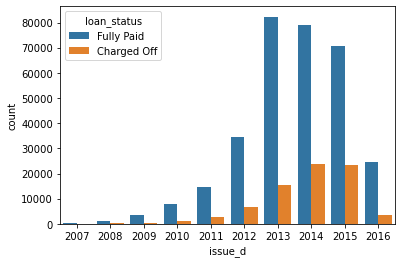

In [66]:
sns.countplot(pd.to_datetime(df['issue_d']).dt.year , hue = df['loan_status'])

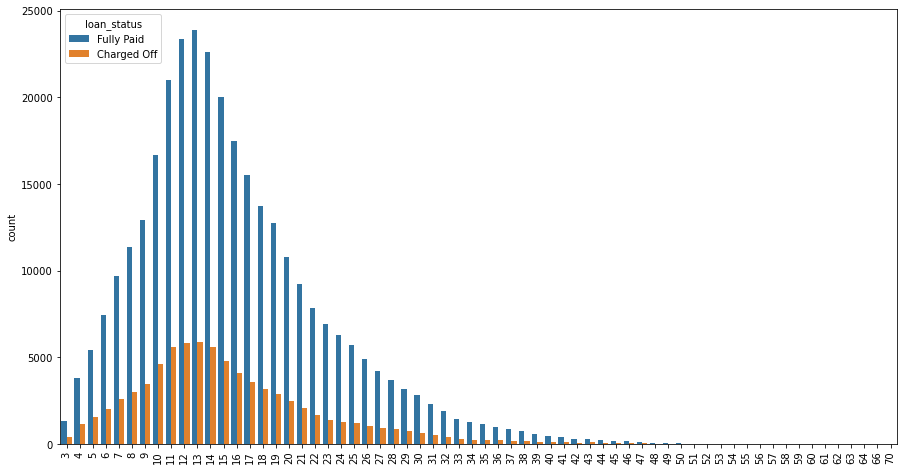

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(pd.to_datetime(df['issue_d']).dt.year  - pd.to_datetime(df['earliest_cr_line']).dt.year  , hue = df['loan_status'])
plt.xticks(rotation=90)
plt.show()

### year extracted from issue_d shows relation with loan_status
### also, with difference in year between issue_d and earliest_cr_line show some relation with loan_status. As the difference in year is around 11-16years, loan disburse is higher and charged-off is also higher. Whereas for rest of the period both die off together.

In [68]:
X['issue_d_year']=pd.to_datetime(df['issue_d']).dt.year
X['year_diff_issue_d_year_earliest-cr_line']=pd.to_datetime(df['issue_d']).dt.year  - pd.to_datetime(df['earliest_cr_line']).dt.year 

## features discussion to use in modeling

In [69]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'address_extract', 'pub_rec_flag',
       'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'issue_d_dt',
       'earliest_cr_line_dt', 'issue_d_year',
       'year_diff_issue_d_year_earliest-cr_line'],
      dtype='object')

In [70]:
cols_to_use = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_title', 'emp_length', 
'home_ownership', 'annual_inc','verification_status', 'issue_d', 'purpose', 'dti','earliest_cr_line', 
'open_acc', 'revol_bal', 'revol_util','total_acc', 'initial_list_status', 'application_type', 'address_extract', 
'pub_rec_flag','mort_acc_flag', 'pub_rec_bankruptcies_flag','issue_d_year', 'year_diff_issue_d_year_earliest-cr_line']

In [71]:
Xmodel = X[cols_to_use]

In [72]:
Xmodel.isnull().sum()

loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_title                                  0
emp_length                                 0
home_ownership                             0
annual_inc                                 0
verification_status                        0
issue_d                                    0
purpose                                    0
dti                                        0
earliest_cr_line                           0
open_acc                                   0
revol_bal                                  0
revol_util                                 0
total_acc                                  0
initial_list_status                        0
application_type                           0
address_extract                            0
pub_rec_fl

In [73]:
Xmodel.dtypes

loan_amnt                                  float64
term                                        object
int_rate                                   float64
installment                                float64
grade                                       object
sub_grade                                   object
emp_title                                   object
emp_length                                  object
home_ownership                              object
annual_inc                                 float64
verification_status                         object
issue_d                                     object
purpose                                     object
dti                                        float64
earliest_cr_line                            object
open_acc                                   float64
revol_bal                                  float64
revol_util                                 float64
total_acc                                  float64
initial_list_status            

In [74]:
Xmodel.iloc[1]

loan_amnt                                                              8000.0
term                                                                36 months
int_rate                                                                11.99
installment                                                            265.68
grade                                                                       B
sub_grade                                                                  B5
emp_title                                                     Credit analyst 
emp_length                                                            4 years
home_ownership                                                       MORTGAGE
annual_inc                                                            65000.0
verification_status                                              Not Verified
issue_d                                                              Jan-2015
purpose                                                    debt_

### we will do label encoding for term, emp_length as they have ordinality in data. It may happen that features "term" and "emp_length" affect the loan_status. 

### above plot shows dependency of "emp_length" on loan status. 

In [75]:
le =LabelEncoder()
Xmodel['term'] = le.fit_transform(Xmodel['term'])

In [76]:
X['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [77]:
Xmodel['term'].unique()

array([0, 1])

In [78]:
le.classes_

array([' 36 months', ' 60 months'], dtype=object)

In [79]:
leEL =LabelEncoder()
Xmodel['emp_length'] = leEL.fit_transform(Xmodel['emp_length'])

In [80]:
Xmodel['emp_length'].unique()

array([ 1,  4, 10,  6,  9,  2,  3,  8,  7,  5,  0, 11])

In [81]:
X['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       'unknown'], dtype=object)

In [82]:
leEL.classes_

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'unknown'],
      dtype=object)

In [83]:
Xmodel.iloc[1]

loan_amnt                                                              8000.0
term                                                                        0
int_rate                                                                11.99
installment                                                            265.68
grade                                                                       B
sub_grade                                                                  B5
emp_title                                                     Credit analyst 
emp_length                                                                  4
home_ownership                                                       MORTGAGE
annual_inc                                                            65000.0
verification_status                                              Not Verified
issue_d                                                              Jan-2015
purpose                                                    debt_

In [84]:
X['purpose'].nunique()

14

### we will do one-hot encoding for features - grade, sub_grade, home_ownership, verification_status, purpose,application_type, initial_list_status

In [85]:
grade_df = pd.DataFrame(X['grade'], columns=['grade'])
sub_grade_df = pd.DataFrame(X['sub_grade'], columns=['sub_grade'])
home_ownership_df = pd.DataFrame(X['home_ownership'], columns=['home_ownership'])
verification_status_df = pd.DataFrame(X['verification_status'], columns=['verification_status'])
purpose_df = pd.DataFrame(X['purpose'], columns=['purpose'])
application_type_df = pd.DataFrame(X['application_type'], columns=['application_type'])

initial_list_status_df = pd.DataFrame(X['initial_list_status'], columns=['initial_list_status'])

In [86]:
grade_dum_df = pd.get_dummies(grade_df, columns=["grade"], prefix=["grade"])
sub_grade_dum_df = pd.get_dummies(sub_grade_df, columns=["sub_grade"], prefix=["sub_grade"])

home_ownership_dum_df = pd.get_dummies(home_ownership_df, columns=["home_ownership"], prefix=["home_ownership"])
verification_status_dum_df = pd.get_dummies(verification_status_df, columns=["verification_status"], prefix=["verification_status"])

purpose_dum_df = pd.get_dummies(purpose_df, columns=["purpose"], prefix=["purpose"])
application_type_dum_df = pd.get_dummies(application_type_df, columns=["application_type"], prefix=["application_type"])

initial_list_status_dum_df = pd.get_dummies(initial_list_status_df, columns=["initial_list_status"], prefix=["initial_list_status"])

In [87]:
Xmodel = Xmodel.join(grade_dum_df)
Xmodel = Xmodel.join(sub_grade_dum_df)
Xmodel = Xmodel.join(home_ownership_dum_df)

Xmodel = Xmodel.join(verification_status_dum_df)
Xmodel = Xmodel.join(purpose_dum_df)
Xmodel = Xmodel.join(application_type_dum_df)

Xmodel = Xmodel.join(initial_list_status_dum_df)

In [88]:
Xmodel.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'address_extract',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'issue_d_year', 'year_diff_issue_d_year_earliest-cr_line', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
     

In [89]:
Xmodel['address_extract'].nunique()

393699

In [90]:
Xmodel['emp_title'].nunique()

173106

In [91]:
# for col in Xmodel1.columns:
#     print(f'{col}---{Xmodel1[col].dtype}----{Xmodel1[col].nunique()}')

In [92]:
Xmodel['emp_title'].value_counts()

unknown                              22927
Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
                                     ...  
Civilian Army Public Health Nurse        1
local 197                                1
Med Tech                                 1
Lakeshore Dairy                          1
Chief Purchasing Clerk                   1
Name: emp_title, Length: 173106, dtype: int64

### We will drop emp_title and address from our model as emp_title has got several Null values. And "address" has several sub-categories

In [93]:
Xmodel.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'address_extract',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'issue_d_year', 'year_diff_issue_d_year_earliest-cr_line', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
     

In [94]:
leY =LabelEncoder()
y_new = y.copy()
y_new['loan_status'] = leY.fit_transform(y_new['loan_status'])

In [139]:
# iteration1

cols_to_use = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc',  'dti',
               'open_acc', 'revol_bal', 'revol_util', 'total_acc',
               'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag','issue_d_year', 'year_diff_issue_d_year_earliest-cr_line' ,'grade_A','grade_B', 'grade_C', 'grade_D', 'grade_E', 
               'grade_F', 'grade_G','sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4','sub_grade_A5', 'sub_grade_B1', 
               'sub_grade_B2', 'sub_grade_B3','sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2','sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
                'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
                'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
                   'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
               'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
               'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_ANY',
               'home_ownership_MORTGAGE', 'home_ownership_NONE',
               'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
               'verification_status_Not Verified',
               'verification_status_Source Verified', 'verification_status_Verified',
               'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
               'purpose_educational', 'purpose_home_improvement', 'purpose_house',
               'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
               'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
               'purpose_vacation', 'purpose_wedding', 'application_type_DIRECT_PAY',
               'application_type_INDIVIDUAL', 'application_type_JOINT',
               'initial_list_status_f', 'initial_list_status_w']


In [96]:
# iteration2

cols_to_use =['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc',  'dti',
               'open_acc', 'revol_bal', 'revol_util', 'total_acc',
               'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag','issue_d_year', 'year_diff_issue_d_year_earliest-cr_line']
              

In [138]:
# iteration 3

cols_to_use = list(feature_importanceTop20.features)

### we iterate over different combinations of features to see if there is any improvement in model score.Here , we will try to optimize f1-score as we are interested in lower FP and lower FN. 

In [140]:
Xmodel1 = Xmodel[cols_to_use]

In [141]:
Xmodel1.shape,  y_new.shape

((396029, 86), (396029, 1))

In [142]:
Xmodel1.reset_index(drop=True, inplace=True)
y_new.reset_index(drop=True, inplace=True)

In [143]:
# list(Xmodel1.dtypes)

### Logistic regression

### splitting dataset into train/test/validation

In [144]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(Xmodel1, y_new, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)


In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237617, 86), (79206, 86), (237617, 1), (79206, 1))

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [147]:
# for col in Xmodel1.columns:
#     print(f'{col}---{Xmodel1[col].dtype}----{Xmodel1[col].nunique()}')

In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [149]:
Xmodel1.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
0,10000.0,0,11.44,329.48,1,117000.0,26.24,16.0,36369.0,41.8,...,0,0,0,1,0,0,1,0,0,1
1,8000.0,0,11.99,265.68,4,65000.0,22.05,17.0,20131.0,53.3,...,0,0,0,0,0,0,1,0,1,0
2,15600.0,0,10.49,506.97,10,43057.0,12.79,13.0,11987.0,92.2,...,0,0,0,0,0,0,1,0,1,0
3,7200.0,0,6.49,220.65,6,54000.0,2.60,6.0,5472.0,21.5,...,0,0,0,0,0,0,1,0,1,0
4,24375.0,1,17.27,609.33,9,55000.0,33.95,13.0,24584.0,69.8,...,0,0,0,0,0,0,1,0,1,0


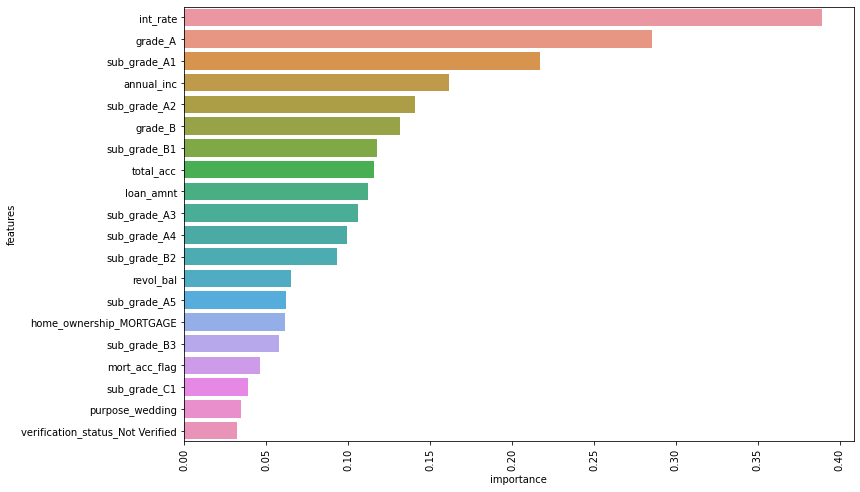

In [150]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

importance = model.coef_[0]
feats_lst = []
imp_lst = []
# summarize feature importance
for i,v in zip(Xmodel1.columns,importance):
    feats_lst.append(i)
    imp_lst.append(v)
feature_importance = pd.DataFrame({'features':feats_lst,'importance':imp_lst})
feature_importance.head()
# plot feature importance

feature_importanceTop20 = feature_importance.nlargest(n=20,columns = 'importance')
plt.figure(figsize=(12,8))
sns.barplot(x= 'importance', y ='features', data = feature_importanceTop20)
plt.xticks(rotation=90)
plt.show()


In [151]:
list(feature_importanceTop20.features)

['int_rate',
 'grade_A',
 'sub_grade_A1',
 'annual_inc',
 'sub_grade_A2',
 'grade_B',
 'sub_grade_B1',
 'total_acc',
 'loan_amnt',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_B2',
 'revol_bal',
 'sub_grade_A5',
 'home_ownership_MORTGAGE',
 'sub_grade_B3',
 'mort_acc_flag',
 'sub_grade_C1',
 'purpose_wedding',
 'verification_status_Not Verified']

### depending upon important features as get above, we will iterate different runs with different set of features

In [152]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val)}') 

Train Accuracy:0.8063185714826802, Val Accuracy:0.8054314067116127


In [153]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.1, 10000, 1000): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
#     train_score = scaled_lr.score(X_train, y_train)
    train_score = roc_auc_score(y_train, scaled_lr.predict_proba(X_train)[:,1])
#     val_score = scaled_lr.score(X_val, y_val)
    val_score = roc_auc_score(y_val, scaled_lr.predict_proba(X_val)[:,1])
    train_scores.append(train_score)
    val_scores.append(val_score)

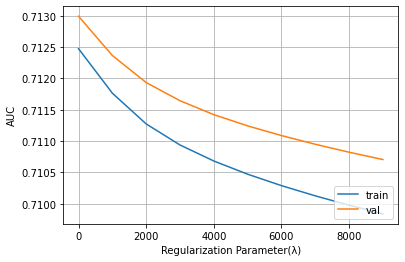

In [154]:
plt.figure()
plt.plot(list(np.arange(0.1, 10000, 1000)), train_scores, label="train")
plt.plot(list(np.arange(0.1, 10000, 1000)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("AUC")
plt.grid()
plt.show()

In [155]:
### with the present features, the AUC value is highest at iteration 0

In [156]:
np.argmax(val_scores)

0

In [157]:
val_scores[0]

0.7129932506760381

In [158]:
l_best = 0.01 * 0* 100

In [159]:
# test_score = scaled_lr.score(X_test,y_test)
# print(test_score)

In [160]:
scaled_lr = make_pipeline( scaler, LogisticRegression())
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [161]:
y_pred_prob=scaled_lr.predict_proba(X_val)
print(y_pred_prob)

[[0.11089124 0.88910876]
 [0.3941469  0.6058531 ]
 [0.14464752 0.85535248]
 ...
 [0.45984016 0.54015984]
 [0.19364879 0.80635121]
 [0.33533933 0.66466067]]


In [162]:
pred_val = pd.DataFrame(scaled_lr.predict_proba(X_val)[:,1], columns=['probability'])

In [205]:
pred_val['y_pred_val'] = pred_val['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

### threshold is adjusted to optimize for higher f1 score in the model

In [206]:
pred_val['y_pred_val'].value_counts()

1    77622
0     1584
Name: y_pred_val, dtype: int64

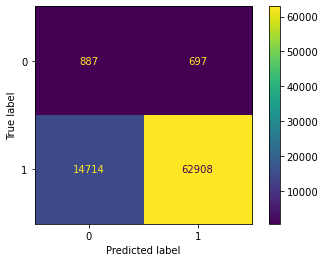

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_val = confusion_matrix(pred_val['y_pred_val'],y_val)
ConfusionMatrixDisplay(cm_val).plot()

In [208]:
from sklearn.metrics import precision_score

precision_score(y_val, pred_val['y_pred_val'])

0.810440339079127

In [209]:
from sklearn.metrics import recall_score

recall_score(y_val, pred_val['y_pred_val'])

0.989041742001415

In [210]:
from sklearn.metrics import f1_score

f1_score(y_val, pred_val['y_pred_val'])

0.8908778066517026

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

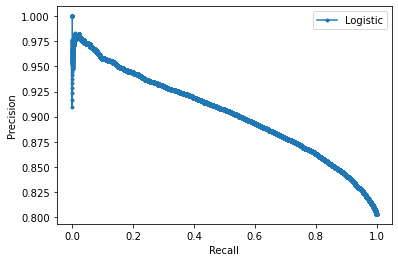

In [211]:
precision, recall, _ = precision_recall_curve(y_val, pred_val['probability'])

# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [212]:
from sklearn.metrics import auc
auc(recall, precision)


0.9030225440454561

## evaluation on test dataset

In [213]:
pred_test = pd.DataFrame(scaled_lr.predict_proba(X_test)[:,1], columns=['probability'])
pred_test['y_pred_test'] = pred_val['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
pred_test['y_pred_test'].value_counts()


1    77622
0     1584
Name: y_pred_test, dtype: int64

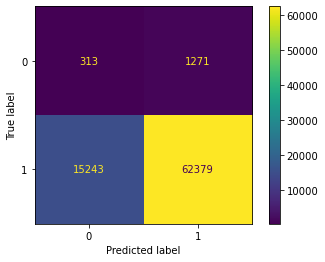

In [214]:
cm_test = confusion_matrix(pred_test['y_pred_test'],y_test)
ConfusionMatrixDisplay(cm_test).plot()

In [215]:
precision_score(y_test, pred_test['y_pred_test'])

0.8036252608796475

In [216]:
recall_score(y_test, pred_test['y_pred_test'])

0.9800314218381775

In [217]:
f1_score(y_test, pred_test['y_pred_test'])

0.8831049323291238

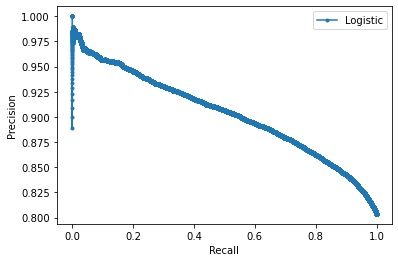

In [218]:
precision, recall, _ = precision_recall_curve(y_test, pred_test['probability'])

# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [219]:
from sklearn.metrics import auc
auc(recall, precision)


0.9032037459590575

## discussion from model evaluation
### the threshold value is adjusted for higher f1score on validation set. Then it is tested on test dataset. We get f1score ~88% on the test dataset.  
### Since, the f1score remains same almost same for both train and validation set with changing different features, we don't see overfitting in the dataset. This is further confirmed with similar f1score on test dataset. 
### The parameter tuning for lambda shows no change. We got highest f1 score at start of iteration. So, I decided to keep it 0.

# Section3: recommendation and insights

### 1.  What percentage of customers have fully paid their Loan Amount?---> ~80%

### 2. Comment about the correlation between Loan Amount and Installment features? ---> There is very high correlation (95%) between loan_amount to installment. This looks obvious as higher the loan amount, higher the installment amount. But, we can check interest rate as well.

### 3. The majority of people have home ownership as _______. --- > MORTGAGE

### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F) ---> False

### 5. Name the top 2 afforded job titles. ---> Teacher and Manager
### 6. Thinking from a bank's perspective, which metric should our primary focus be on.. ---> 
### ROC AUC
### Precision
### Recall
### F1 Score

### ---> In present case, considering "Charged Off" as class 1,if we minimize FP- this means we are predicting "charging-off" more. This may lead to loss in revenue. Whereas, if we minimize FN- this means we are "charging-off" less implying we are letting go individuals who defaults. So, we need to balance this trade-off. Since we have to balance both , we will focus on f1 score.

### 7. How does the gap in precision and recall affect the bank? ---> we have to balance both in this case. We can't have low precision as this will imply high FP which further means losing out on revenue. We are losing on potential customer who can pay-off the loan. At the sametime, we can't have low Recall as this will mean high FN. We will not be able to capture customers who were "charged-off". In this case, losing out revenue once again. So, for the such cases, bank will have to consider combination of both metrics (like F1 score)
### 8. Which were the features that heavily affected the outcome? ---> 'int_rate', 'annual_inc', 'total_acc', 'loan_amnt', 'revol_bal', 'mort_acc_flag',sub_grade

### 9. Will the results be affected by geographical location? (Yes/No) ---> Yes (According to address (geography), loan is mostly disrbused to AE 05113 and AE 70466 locations where it was fully-paid and no charged_off was observed. There is 50-50 case for location AE 22690 where fully_paid records are same of of charged_off.)

In [179]:
### few calculations to generate insights:

### ratio of charged_off abd fully_paid when grade is C and B
print(len(df[(df['grade'] =='C') & (df['loan_status'] == 'Charged Off')])/ len(df[(df['grade'] =='C') & (df['loan_status'] == 'Fully Paid')]))


print(len(df[(df['grade'] =='B') & (df['loan_status'] == 'Charged Off')])/ len(df[(df['grade'] =='C') & (df['loan_status'] == 'Fully Paid')]))


0.26872800402212166
0.1746151452033805


In [198]:
len(df[df['annual_inc']<50000]['annual_inc'])

117878

In [195]:
df['annual_inc'].head()

0    117000.0
1     65000.0
2     43057.0
3     54000.0
4     55000.0
Name: annual_inc, dtype: float64

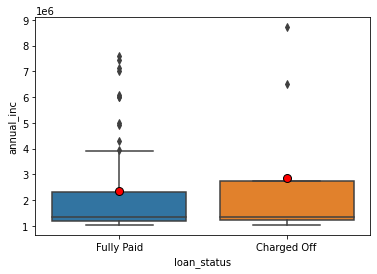

In [204]:
sns.boxplot(y = df[df['annual_inc']>1000000]['annual_inc'], x= df['loan_status'] ,showmeans=True
           , meanprops={"marker":"o",
                   "markerfacecolor":"red", 
                   "markeredgecolor":"black",
                  "markersize":"8"})
plt.show()


## Insights:

### 1. More "charged off" observed where "interest rate" is higher. 
### 2. There is very high correlation between loan_amount to installment. This looks obvious as higher the loan amount, higher the installment amount. But, we can check interest rate as well. 
### 3. Loan and pay-offs is favourable when :
### a. loan is given for term 36months
### b. ratio of charged_off and fully_paid is greater for loan grade C than B. This implies there is more "Charging Off" when loan grade is C.
### d. Loan is given more to people with emp-title "teacher" and "manager". However, pay-off and charged-off also varies similar in both cases.
### e. Clearly Pay off is more when emp_length is more than 10years. We can target such individuals.
### f. People have home ownership as "Mortgage" are likely to pay off more.
### f. For most of people, purpose of loan is "debt consolidation" followed by "credit_card" bill requirement. 
### g. Pay off is more when initial listing status of loan is "f"
### h. Pay off is more when loan application type is "individual"

## Recommendation:
### 1. Target profile for better loan pay off is people who are - Individals, have work experience of 10+ years, having purpose of loan as debt-consolidation, who have home-ownership as "Mortgage". 
### 2. we can come up with user-friendly schemes when purpose of loan is "credit card". Some favourable interest rate can be provided so as to target these customers.
### 3. Loan pay-off is more when the term of loan repayment is 36months. We can have more 'terms' in between 36 and 60 months.
### 4. when interest rate is higher, charged_off is more. When can have more user-friendly interest rate depending upon profile of customer. 
### 5. People with higher annual income (1*10^6) are likely to pay-off more.
